# Medical Cost Prediction

The aim of this analysis is to predict the medical expense based on the patients'information. The dataset used for this analysis is Insurance dataset from Kaggle. The dataset contains 1338 observations and 7 variables. The variables are as follows:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import Series, DataFrame

In [2]:
df = pd.read_csv("C:\\Users\\Ravi Nadageri\\Documents\\Github_projects\\Medical Cost Prediction\\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Preprocessing

In [3]:
# Let's check the number of rows and columns
df.shape

(1338, 7)

In [4]:
#checking the missing values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# lets review the discriptive statistics using Describe() Method
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#value counts for categorical variables
print(df.sex.value_counts(),'\n',df.smoker.value_counts(),'\n',df.region.value_counts())

male      676
female    662
Name: sex, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


# Exploratory Data Analysis

Visualization is the best way to understand the data in few seconds or one view 

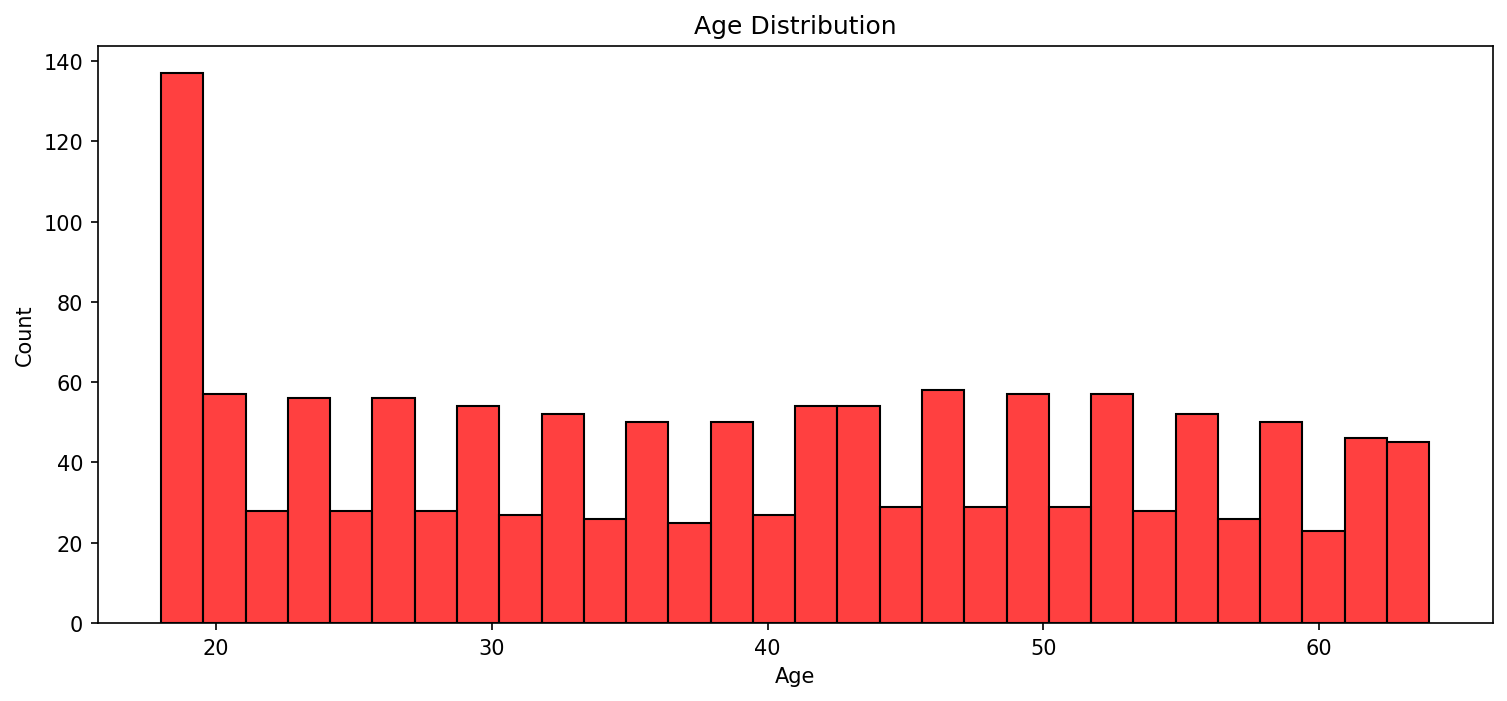

In [7]:
plt.figure(figsize=(12,5),dpi=150)
sns.histplot(df.age,bins=30, kde=False,color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Lets plot the gender count plot Men Vs Women

Text(0.5, 1.0, 'Gender Distribution')

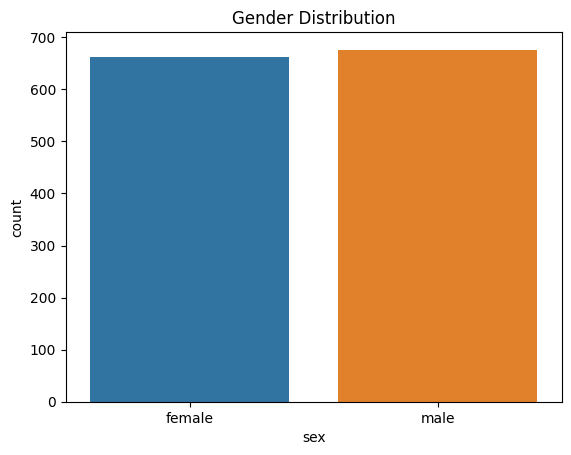

In [8]:
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')

It is clear that the male and female are both equal counts in the dataset

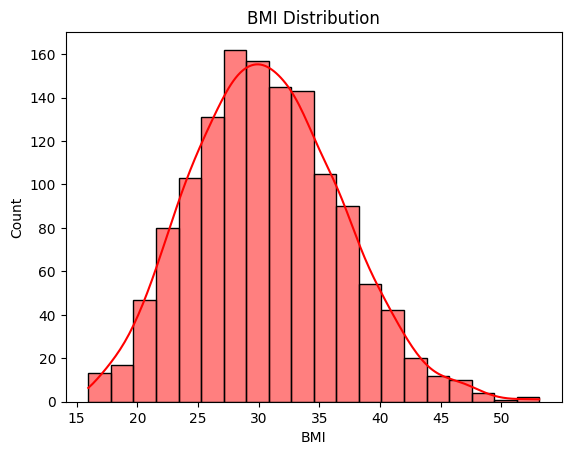

In [9]:
# BMI distribution can be view using kde plot
sns.histplot(df.bmi,bins=20, kde=True,color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

Based on above plot the majority of patients between the Age of 25 to 40 which consider as overweight. This might the major factor increasing the medical cost.

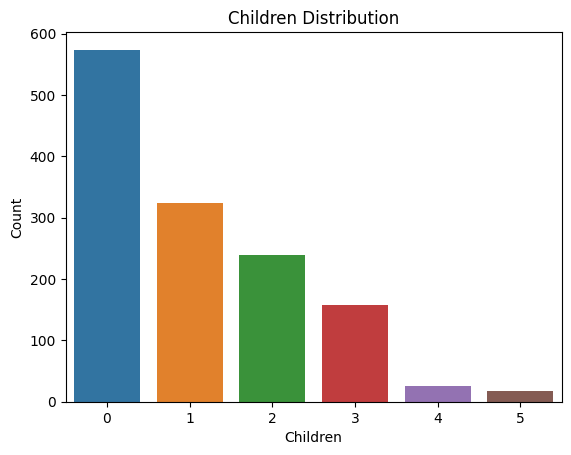

In [10]:
#child count distribution
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

Lets plot similar for the Region wise 

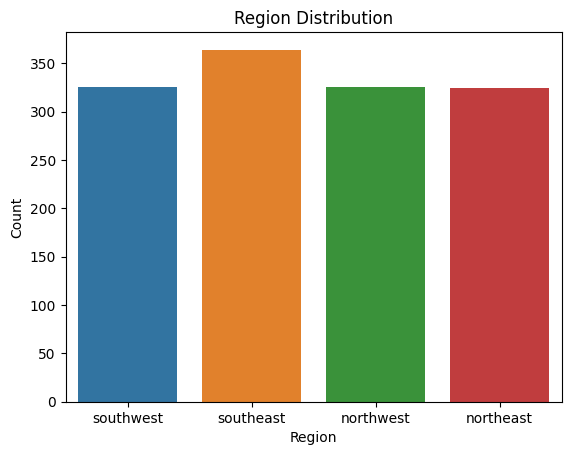

In [11]:
#regionwise plot
sns.countplot(x = 'region', data = df)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

The above chart indicate the count of patient from northeast is slighltly higher than the other regions, but intresting thing is the number of patients from other regions are almost equal.

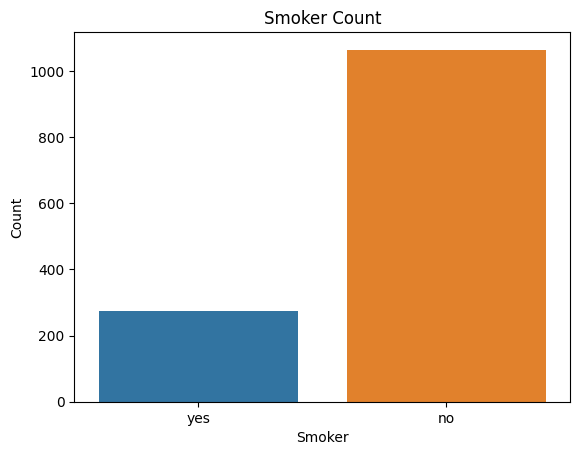

In [12]:
#count of smokers
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

Look like the data set having 80% of non smoker data and 20% people are smoker

In [13]:
df.smoker.value_counts(normalize=True)*100

no     79.521674
yes    20.478326
Name: smoker, dtype: float64

<AxesSubplot:xlabel='smoker', ylabel='count'>

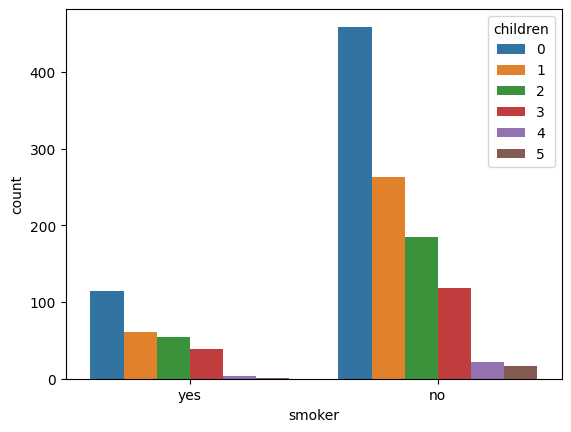

In [14]:
sns.countplot(x = df.smoker, hue = df.children)

Data make sense the non skoker counts are higher as expected

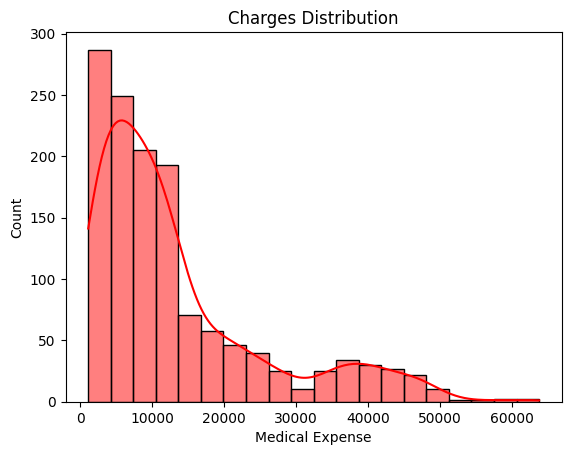

In [15]:
#charges distribution
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

Most of the medical expense is < 20000 and with lower number of patients having medical expense > 50k

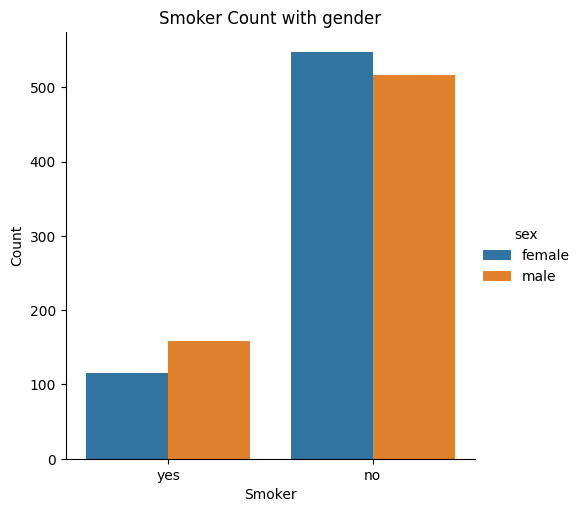

In [16]:
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

So we can notice here more Male smokers than Female smokers. 

So, I can assume that the medical treatment expense for Males would be more than the Females, given the impact of smoking on the medical expenses.

<AxesSubplot:xlabel='sex', ylabel='charges'>

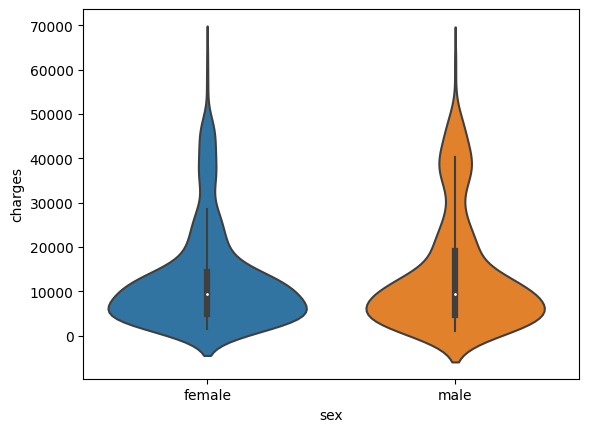

In [17]:
sns.violinplot(x = 'sex', y = 'charges', data = df)

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

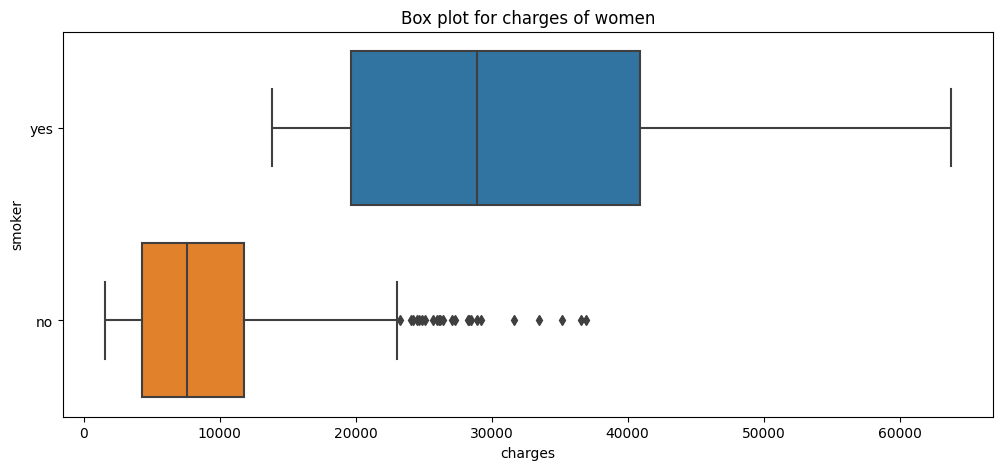

In [18]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(x="charges", y="smoker", data =  df[(df.sex == 'female')] , orient="h")

Yes this true the smoker has the highest medical treatment expense while there are few outliers also for No smoker, But we are not sure whether this are a=outlier or may be any major illness or accidents

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

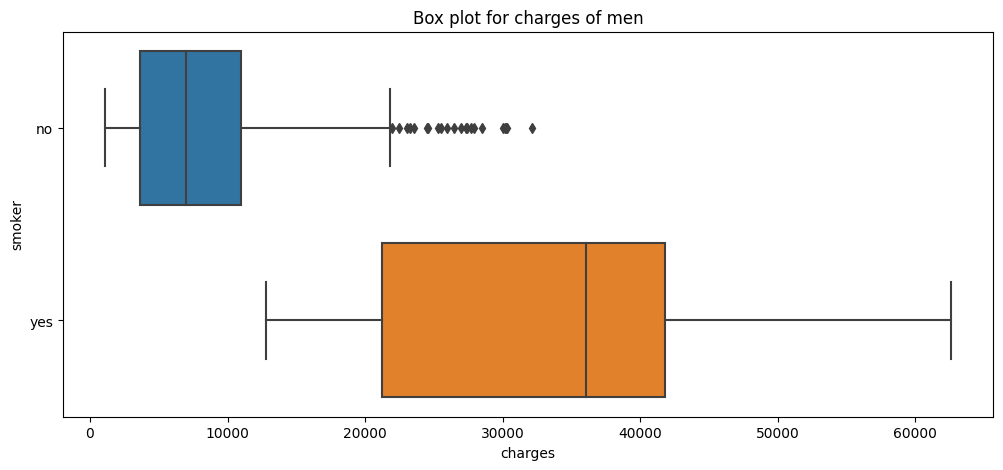

In [19]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 'male')] , orient="h")

As expected the Smoker has the more treatment expense than non smoker

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


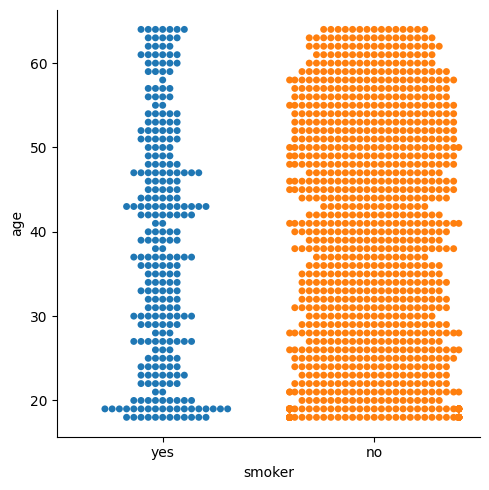

In [20]:
# Smokers and age distribution
sns.catplot(x="smoker", y="age", kind="swarm", data=df)

From the above catplot graph, we can see that there is a significant number of smokers of age 19. Now lets do some study on the medical expense of smokers of age 19.

The view of Catplot is very beautiful

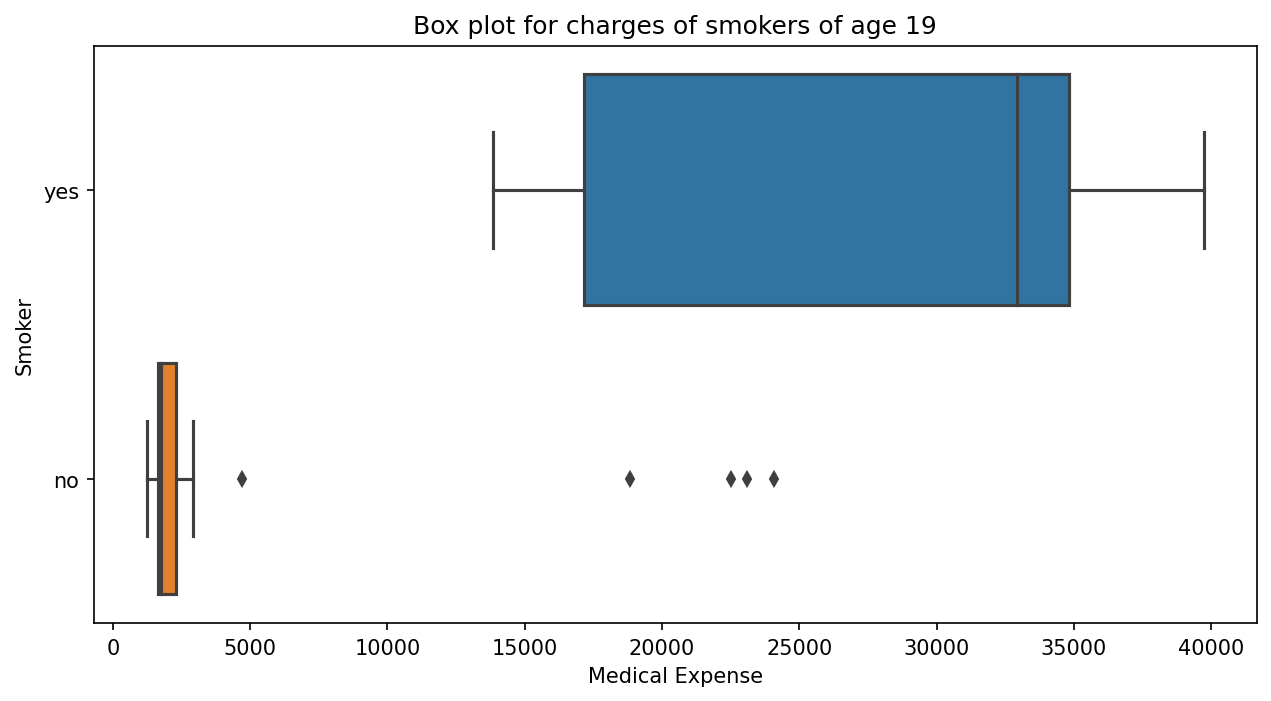

In [22]:
#plot the smokers of age 19 data
plt.figure(figsize=(10,5),dpi = 150)
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges", data =  df[(df.age == 19)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

ohh! Surprisingly the medical expense of smokers of age 19 is very high in comparison to the non smokers of same age range. 

In non smokers we can see some outliners, which could be due to the any major illness or accidents.

Finally it is clear that the smoker nad non smokers have significant difference in medical expenses , Lets plot the Charges vs the smoker and non smoker age

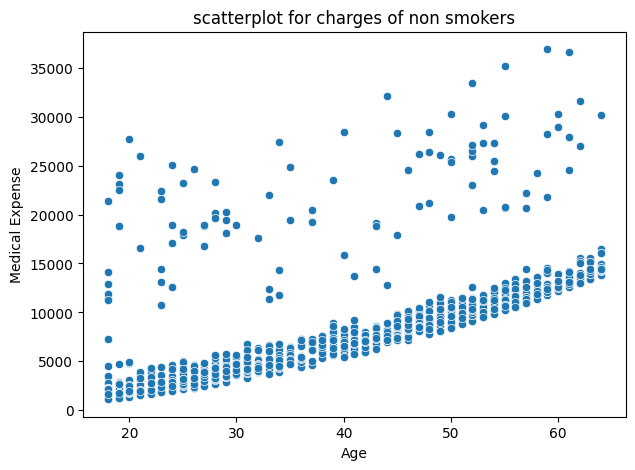

In [28]:
# Non smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data =  df[(df.smoker == 'no')])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Majority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness. 
But there are some outliners which shows that there are other illness or accidents which may increase the medical expense.

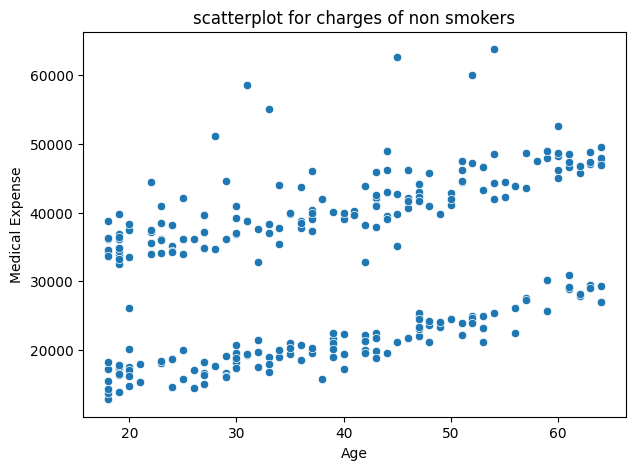

In [23]:
# smokers charge distribution
plt.figure(figsize=(7,5))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data = df[df.smoker=='yes'])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

we can see the 2 liniarity segment in the above graph for Smoker, One with high medical expense which may be due to smoking and the lower expense may be due to the age related illness

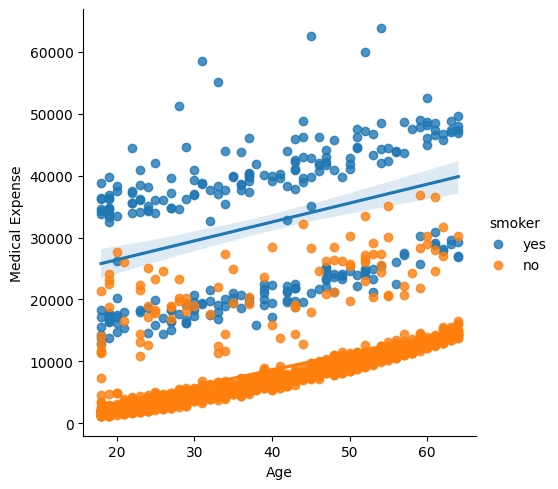

In [24]:
sns.lmplot(x="age", y="charges", data = df, hue='smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Now it is more visible to understand the variation in charges with respect too the Age and smoking habits.
The midecal expense of smoker is higher than non smokers

The cost  of treatment increases with Age which is make sense 

But in smokers the cost of expense is higher even in the lower age patients ( which means the smoking patients are spending upon their smoking related illness as well as age related illness)

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


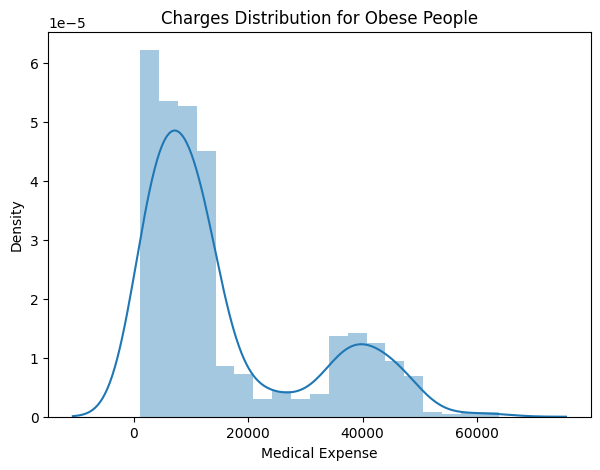

In [25]:
# Charges distribution for patients with BMI greater than 30 i.e. obese patients
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


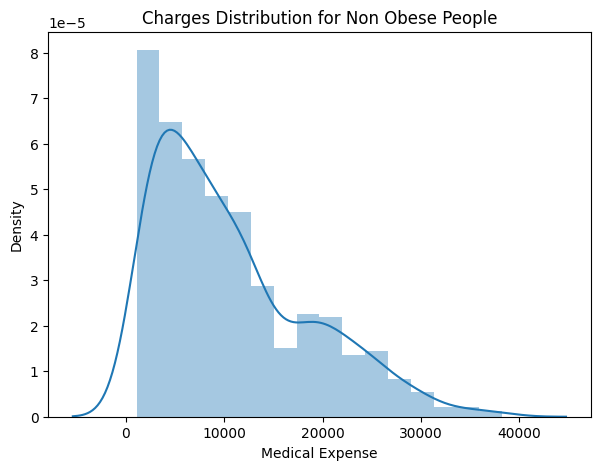

In [38]:
# Charges distribution for patients with BMI less than 30 i.e. healthy patients
plt.figure(figsize=(7,5))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

Therefore, The patients with BMI less than 30 are spending lesser on medical treatment than those with BMI greater than 30.

we have to replace the categorical variables with numerical values.

sex : 1 - male, 0 - female
smoker : 1 - yes, 0 - no
region : 0 - northeast, 1 - northwest, 2 - southeast, 3 - southwest

In [26]:
# Using the .map() we can convert categorical variables into numerical
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [27]:
# coorelation matrix with respect to the 'Charges'
df.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region      0.006208
charges     1.000000
Name: charges, dtype: float64

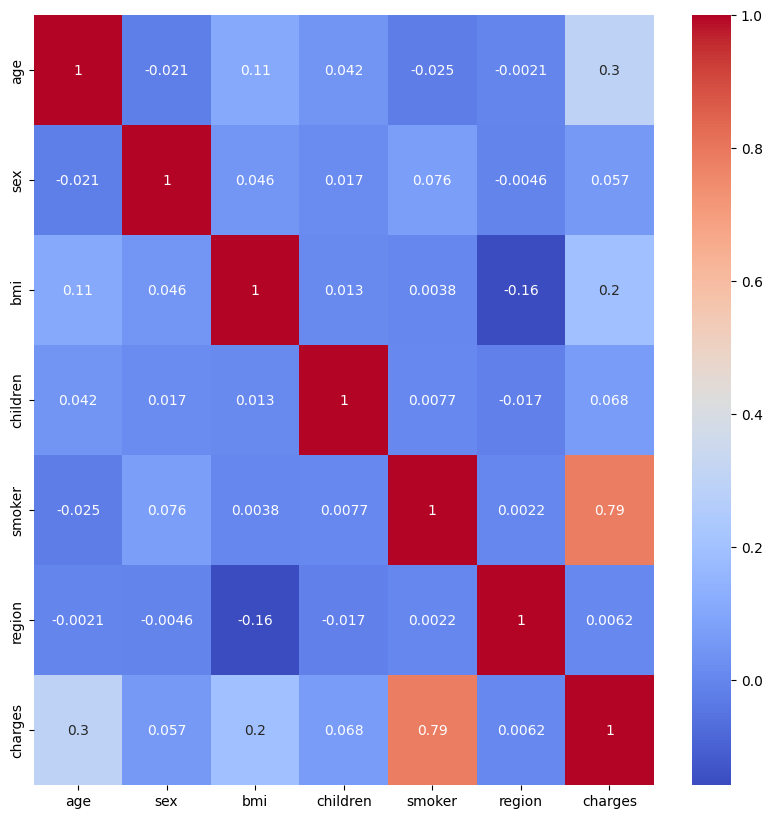

In [28]:
# plotting the coorelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

Through the EDA, we have a clear understanding about the data and the coorelation between the variables. Now, I will build a model to predict the medical expense of patients.

In [29]:
X = df.drop('charges',axis=1)

In [30]:
y = df['charges']

# Train Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Model Building

# Linear Regression

Lets start with Linear Regression model which is easy and fast one, later one we will see some other model too

In [34]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [35]:
#model training
lin_reg.fit(X_train,y_train)

#model accuracy
lin_reg.score(X_train,y_train)

0.7451222029094489

Lets get the prediction number form the model 

In [36]:
#model prediction
lin_reg_pred = lin_reg.predict(X_test)

# Model Evaluation for Linear Regression

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [39]:
print('MAE:', mean_absolute_error(y_test, lin_reg_pred))
print('MSE:', mean_squared_error(y_test, lin_reg_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, lin_reg_pred)))
print('R2 Score:', r2_score(y_test, lin_reg_pred))

MAE: 3990.2503849796162
MSE: 33530131.141361598
RMSE: 5790.520800529223
R2 Score: 0.7613126015198817


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


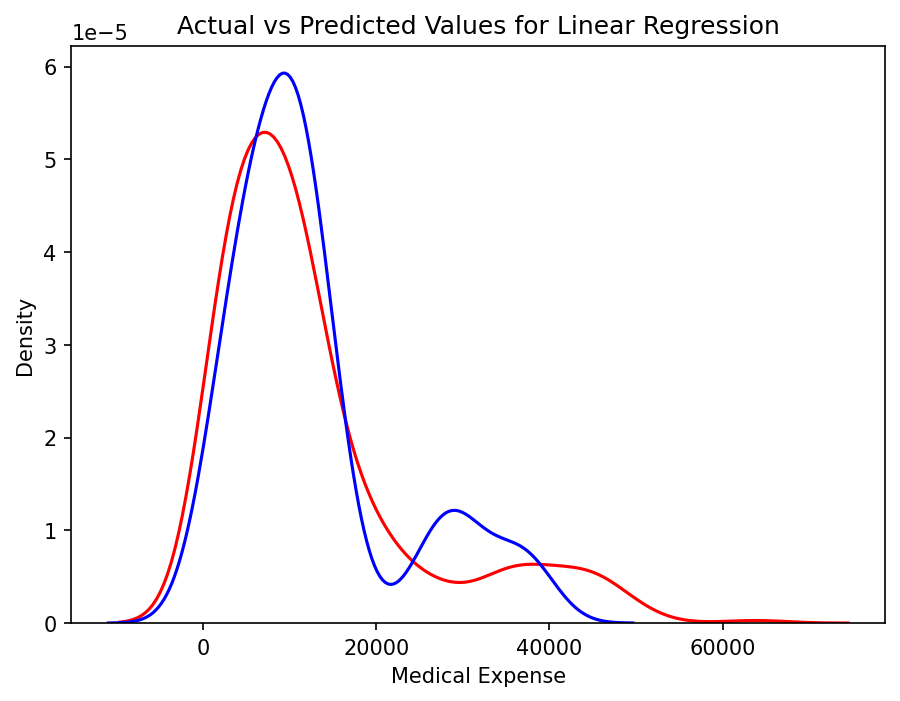

In [42]:
#distribution of actual and predicted values
plt.figure(figsize=(7,5),dpi=150)
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(lin_reg_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

# Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2) 
poly_reg

PolynomialFeatures()

In [44]:
X_train_poly = poly_reg.fit_transform(X_train)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_train_poly, y_train, test_size=0.3, random_state=101)

In [46]:
plr = LinearRegression()
#model training
plr.fit(X_train,y_train)
#model accuracy
plr.score(X_train,y_train)

0.8573827616302494

In [47]:
#model prediction
plr_pred = plr.predict(X_test)

# Model Evaluation for Polynomial Regression

In [48]:
print('MAE:', mean_absolute_error(y_test, plr_pred))
print('MSE:', mean_squared_error(y_test, plr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, plr_pred)))
print('R2 Score:', r2_score(y_test, plr_pred))

MAE: 3275.5143888932384
MSE: 29699946.600720417
RMSE: 5449.765738150624
R2 Score: 0.7766955910909692


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


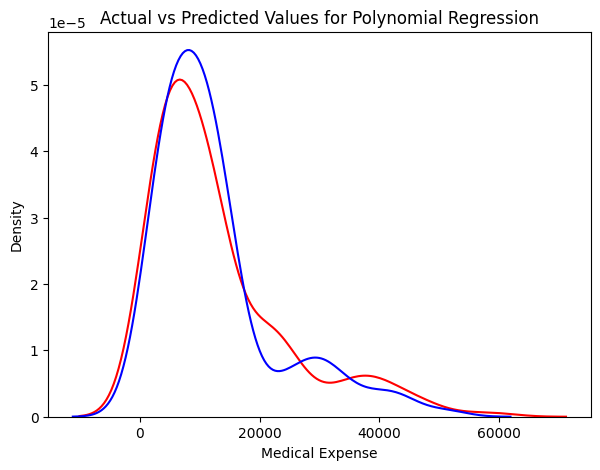

In [50]:
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(plr_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.show()

Decision Tree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [66]:
#model training
dtree.fit(X_train,y_train)
#model accuracy
dtree.score(X_train,y_train)

1.0

In [53]:
dtree_pred = dtree.predict(X_test)

# Model Evaluation for Decision Tree Regressor

In [57]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('R2 Score:', r2_score(y_test, dtree_pred))

MAE: 2901.055538679715
MSE: 38905589.88789425
RMSE: 6237.434559808564
R2 Score: 0.7074813005568619


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


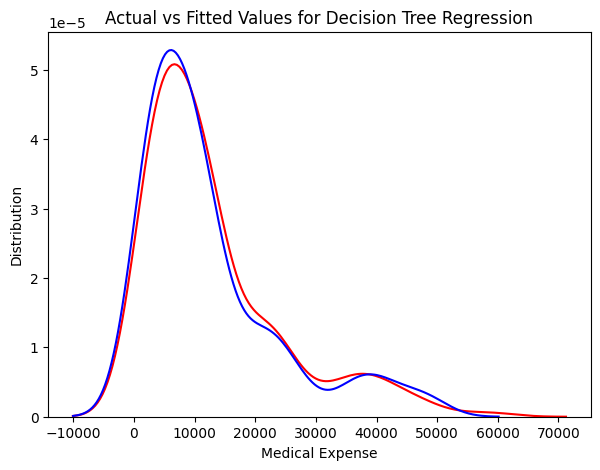

In [55]:
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

Graph looks perfect compare to the rest 

# Random Forest Regressor

In [58]:
from sklearn.ensemble import RandomForestRegressor
rand_forest = RandomForestRegressor(n_estimators=100)
rand_forest

RandomForestRegressor()

In [59]:
#model training
rand_forest.fit(X_train,y_train)
#model accuracy
rand_forest.score(X_train,y_train)

0.9795744225263987

In [60]:
#model prediction
rf_pred = rand_forest.predict(X_test)

# Model Evaluation for Random Forest Regressor

In [65]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('R2 Score:', r2_score(y_test,rf_pred))

MAE: 2699.9591044747335
MSE: 26627053.078295477
RMSE: 5160.1408002394155
Accuracy: 0.7997996956501622


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


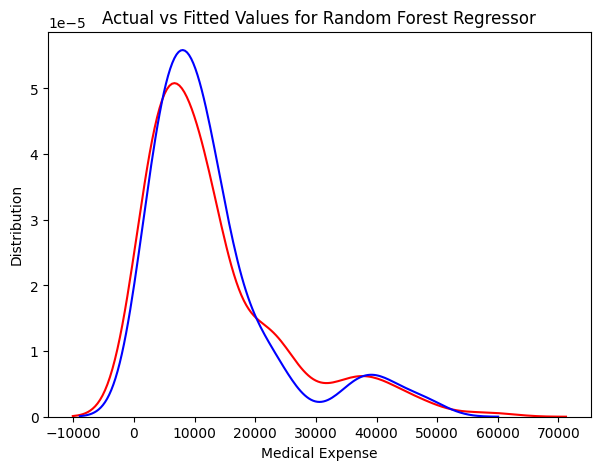

In [77]:
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

# Conclusion
From the above models, we can see that Decision Tree Regressor and Random Forest Regressor are giving the best results.

But, Random Forest Regressor is giving the best results with the least RMSE value. Therefore, I will use Random Forest Regressor to predict the medical expense of patients.

Moreover, the medical expense of smokers is higher than that of non-smokers. The medical expense of patients with BMI greater than 30 is higher than that of patients with BMI less than 30. The medical expense of older patients is higher than that of younger patients.

Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits.